# Question 4

In [2]:
import numpy as np

## Part A 

### Read the datasets

In [ ]:
#0 - business, 1 - entertainment, 2 - politics, 3 - sport, 4 - tech

In [7]:
#Read bbc.classes into an array, but skip the first 2 lines
bbc_classes = np.genfromtxt('bbc.classes', dtype='str', skip_header=4)
# index starts at 0

[['0' '0']
 ['1' '0']
 ['2' '0']
 ...
 ['2222' '4']
 ['2223' '4']
 ['2224' '4']]


In [12]:
#read bbc.mtx into a sparse matrix
bbc_mtx = np.genfromtxt('bbc.mtx', dtype='int', skip_header=2)
print(bbc_mtx)

#create a new matrix that has the same number of rows as bbc_classes, and the 
#same number of columns as bbc_mtx. Fill it with 0s.

bbc_mtx2 = np.zeros((2225, 9635), dtype='int')
print(bbc_mtx2)

[[   1    1    1]
 [   1    7    2]
 [   1   11    1]
 ...
 [9635 2184    1]
 [9635 2186    1]
 [9635 2218    1]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
def occurence(term_id, doc_id):
    #if there is a row in bbc_mtx that has the column 1 equal to term_id and column 2 equal to doc_id, return the value in column 3
    #else return 0
    for row in bbc_mtx:
        if row[0] == term_id and row[1] == doc_id:
            return row[2]
    return 0

In [31]:
#fill bbc_mtx2 with the values from bbc_mtx by iterating through the rows of bbc_mtx
count  = 0
i = 1
for row in bbc_mtx:
    #look at row[1] 
    #and fill the row[row[id]] in bbc_mtx2 at column row[0] with 1
    bbc_mtx2[row[1]-1][row[0]-1] = 1



[1 1 1 ... 0 0 0]


In [43]:
print(bbc_mtx2)

[[1 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [46]:
# save bbc.terms into an array
bbc_terms = np.genfromtxt('bbc.terms', dtype='str')
print(bbc_terms)


['ad' 'sale' 'boost' ... 'peripher' 'headphon' 'flavour']


In [143]:
print(bbc_mtx2)

[[1 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [144]:
#remove the first column of bbc_classes
bbc_classes2 = np.delete(bbc_classes, 0, 1)
#save the values as integers
bbc_classes2 = bbc_classes2.astype(int)
print(bbc_classes2)


[[0]
 [0]
 [0]
 ...
 [4]
 [4]
 [4]]


### Split the datasets

In [145]:
#split the data into training and test sets
#training set: 80% of the data
#test set: 20% of the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bbc_mtx2, bbc_classes2, test_size=0.2, random_state=42)

### Calculating probabilities

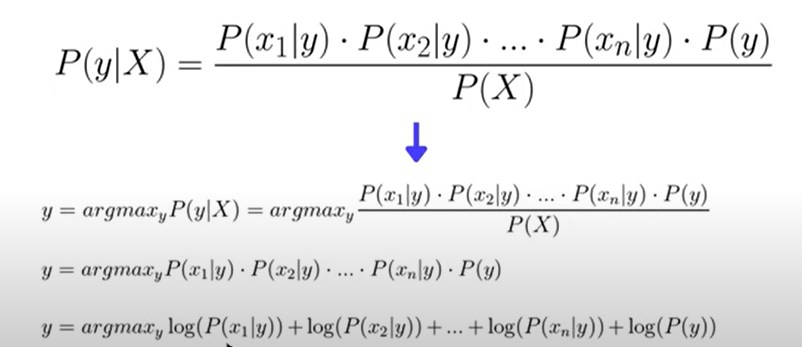

##### Prior Probabilities

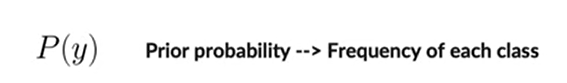

In [146]:
# using the training set, calculate the probability of each class
# P(c) = number of documents in class c / total number of documents
prior = np.zeros((5,1))
for i in range(5):
    prior[i] = np.sum(y_train == i) / len(y_train)

print(prior)



[[0.22191011]
 [0.17640449]
 [0.19157303]
 [0.22977528]
 [0.18033708]]


##### Likelihoods

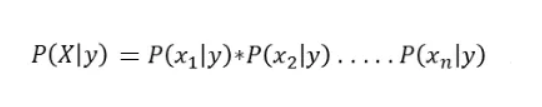

In [167]:
#Likelihood : P(term|class) = (number of documents in class that contain term) / (number of documents in class)
# create a matrix that has 9635 columns and 5 rows
likelihood = np.zeros((9635, 5))

#Using the training set, calculate the likelihood of each term in each class

# for each term:
#     find the number of documents in each class that contain the term
#     divide by the number of documents in each class
#     store the result in the likelihood matrix

#for each column in X_train
for i in range(9635):
    count_0 = 0
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    #for each row in X_train
    for j in range(len(X_train)):
        #if the value in the row is 1
        if X_train[j][i] == 1:
            #check the value in the corresponding row in y_train
            if y_train[j] == 0:
                count_0 += 1
            elif y_train[j] == 1:
                count_1 += 1
            elif y_train[j] == 2:
                count_2 += 1
            elif y_train[j] == 3:
                count_3 += 1
            elif y_train[j] == 4:
                count_4 += 1
    likelihood[i][0] = (count_0+1) / (np.sum(y_train == 0) +2)
    likelihood[i][1] = (count_1+1) / (np.sum(y_train == 1) +2)
    likelihood[i][2] = (count_2+1) / (np.sum(y_train == 2) +2)
    likelihood[i][3] = (count_3+1) / (np.sum(y_train == 3) +2)
    likelihood[i][4] = (count_4+1) / (np.sum(y_train == 4) +2)

print(likelihood)


[[0.25944584 0.22151899 0.36151603 0.33819951 0.28173375]
 [0.31234257 0.17405063 0.02915452 0.05109489 0.17337461]
 [0.19143577 0.03481013 0.06413994 0.04379562 0.05263158]
 ...
 [0.00251889 0.00316456 0.00291545 0.00243309 0.0123839 ]
 [0.00251889 0.00316456 0.00291545 0.00243309 0.0123839 ]
 [0.00251889 0.00316456 0.00291545 0.00243309 0.00619195]]


#### Posterior Probability

In [89]:
def posterior_prob(term_id, class_id):
    #return the posterior probability of the term_id given the class_id
    return likelihood[term_id][class_id] 

#### Classify

In [183]:
# Calculate the posterior probability of each class given a document and return the class with the highest probability
#and return the class with the highest probability

def classify(doc_id):
    #find  all the terms in the document
    terms = []
    probabilities = np.zeros((5,1))
    for i in range(len(X_test[doc_id])):
        if X_test[doc_id][i] == 1:
            terms.append(i)
    
    for i in range(5):
        probabilities[i] = np.log(prior[i])
        for term in terms:
            probabilities[i] += np.log(posterior_prob(term, i))

    return np.argmax(probabilities)

def classify_train(doc_id):
    #find  all the terms in the document
    terms = []
    probabilities = np.zeros((5,1))
    for i in range(len(X_train[doc_id])):
        if X_train[doc_id][i] == 1:
            terms.append(i)
    
    for i in range(5):
        probabilities[i] = np.log(prior[i])
        for term in terms:
            probabilities[i] += np.log(posterior_prob(term, i))

    return np.argmax(probabilities)

In [184]:
#test the classifier on the test set
correct = 0
for i in range(len(X_test)):
    if classify(i) == y_test[i]:
        correct += 1

print("Acurracy on testing set: ", correct/len(X_test))

#test the classifier on the training set
correct = 0
for i in range(len(X_train)):
    if classify_train(i) == y_train[i]:
        correct += 1

print("Acurracy on training set: ", correct/len(X_train))


Acurracy:  0.9056179775280899
Acurracy:  0.9601123595505618


#### The accuracy on the training set is 96%
#### The accuracy on the testing set is 90.6%

## Part B

#### Using Gaussians now

In [ ]:
#Testing with Gaussian Naive Bayes

In [194]:
#Reload the data with frequency instead of binary
bbc_mtx3 = np.zeros((2225, 9635), dtype='int')

#fill bbc_mtx2 with the values from bbc_mtx by iterating through the rows of bbc_mtx
count  = 0
i = 1
for row in bbc_mtx:
    #look at row[1] 
    #and fill the row[row[id]] in bbc_mtx2 at column row[0] with 1
    bbc_mtx3[row[1]-1][row[0]-1] = row[2]

print(bbc_mtx3)

[[1 5 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [195]:
#split the data into training and test sets
#training set: 80% of the data
#test set: 20% of the data
G_X_train, G_X_test, G_y_train, G_y_test = train_test_split(bbc_mtx3, bbc_classes2, test_size=0.2, random_state=42)

##### Mean

In [196]:
print(G_X_train.shape)    

(1780, 9635)


In [212]:
#Calculate the mean of each term in each class

import numpy as np

# Assume 'X_train' is your training features and 'y_train' is your training labels

# Calculate the mean and variance for each class
mean = np.zeros((5, 9635))
variance = np.zeros((5, 9635))

# for each class
for i in range(5):
    mean[i] = np.mean(G_X_train[G_y_train[:,0] == i], axis=0)
    variance[i] = np.var(G_X_train[G_y_train[:,0] == i], axis=0)

In [217]:
#smooth the variance
variance[variance == 0] += 1e-9


In [224]:
print(mean)

[[0.34683544 0.85822785 0.25063291 ... 0.         0.         0.        ]
 [0.2866242  0.32802548 0.03821656 ... 0.         0.         0.        ]
 [0.46627566 0.03812317 0.09090909 ... 0.         0.         0.        ]
 [0.43765281 0.07090465 0.04400978 ... 0.         0.         0.        ]
 [0.38629283 0.36137072 0.05607477 ... 0.01246106 0.00934579 0.00311526]]


##### Gaussian - Maximum Likelihood Estimation

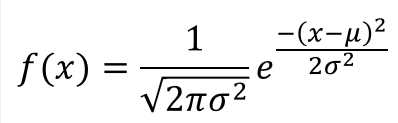

In [220]:
#Implement log Gaussian Naive Bayes
def log_gaussian_prob(x, mean, variance):
    #return the log probability of x given the mean and variance
    return -0.5 * np.log(2 * np.pi * variance) - 0.5 * ((x - mean)**2 / variance)

-1.4189385332046727


In [219]:
#prior probability
prior = np.zeros((5,1))
for i in range(5):
    prior[i] = np.sum(G_y_train == i) / len(G_y_train)

print(prior)

[[0.22191011]
 [0.17640449]
 [0.19157303]
 [0.22977528]
 [0.18033708]]


In [233]:
# Calculate the posterior probability of each class given a document 
# and return the class with the highest probability

def classify_G(doc_id, training_set):
    #find  all the terms in the document
    terms = []
    probabilities = np.zeros((5,1))
    for i in range(len(training_set[doc_id])):
        if training_set[doc_id][i] != 0:
            terms.append(i)
    
    for i in range(5):
        # Add the log prior probability to each class
        probabilities[i] = np.log(prior[i])
        for term in terms:
            # Add the log likelihood of each term to each class
            probabilities[i] += log_gaussian_prob(training_set[doc_id][term], mean[i][term], variance[i][term])
    # Return the class with the highest probability
    return np.argmax(probabilities)


In [234]:
#test the classifier on the test set
correct = 0
for i in range(len(G_X_test)):
    if classify_G(i, G_X_test) == G_y_test[i]:
        correct += 1

print("Acurracy on testing set: ", correct/len(G_X_test))

#test the classifier on the training set
correct = 0
for i in range(len(G_X_train)):
    if classify_G(i, G_X_train) == G_y_train[i]:
        correct += 1

print("Acurracy on training set: ", correct/len(G_X_train))

Acurracy on testing set:  0.9325842696629213
Acurracy on training set:  1.0


##### The accuracy on the testing set: 93.26%
##### The accuracy on the training set: 100%